# Working with Interval Data

Interval data is data that is expressed through quantifiable means. The dataset used for this analysis consist of interval data which is the subject of analysis. The interval data used here is average Temperature(avg Temperature) which is part of the dataset. The dataset being is a global temperature data set that consist of various Continents along with thier Cities and temepratures. 
The data is zipped(to reduce the size) so unzipped it here

In [1]:
!unzip -o -j Temperature.zip

Archive:  Temperature.zip
  inflating: city_temperature.csv    


In [2]:
#for basic operations
import pandas as pd
import numpy as np
#for visualisations
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
city_temp = pd.read_csv("city_temperature.csv")
city_temp.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


A sample of the dataset is shown above with the column names shown below and their data types as well. The main column that would be prominent during analysis is the average temperature(avgTemperature). 

In [4]:
city_temp.columns.values

array(['Region', 'Country', 'State', 'City', 'Month', 'Day', 'Year',
       'AvgTemperature'], dtype=object)

In [5]:
city_temp.dtypes

Region             object
Country            object
State              object
City               object
Month               int64
Day                 int64
Year                int64
AvgTemperature    float64
dtype: object

In [30]:
rows, columns = city_temp.shape
print("There are", rows, "rows and", columns, "columns in the dataset")

There are 2826655 rows and 7 columns in the dataset


Checking to see if there are any null values in the dataset

In [7]:
city_temp.isnull().sum()

Region                  0
Country                 0
State             1450990
City                    0
Month                   0
Day                     0
Year                    0
AvgTemperature          0
dtype: int64

All of the null values occur with in the State column as shown above, therefore, since it is not important towards the analysis I am going for, I have dropped it.

In [8]:
city_temp.drop(["State"], axis = 1, inplace= True)

In [9]:
city_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   City            object 
 3   Month           int64  
 4   Day             int64  
 5   Year            int64  
 6   AvgTemperature  float64
dtypes: float64(1), int64(3), object(3)
memory usage: 155.2+ MB


In [10]:
city_temp["Day"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31,  0])

Here we see that in the **Day** column, there are 32 unique values one of which is 0. However, zero is not a valid day so it has to be removed.

In [11]:
len(city_temp[city_temp["Day"]== 0])

8

In [12]:
city_temp = city_temp[city_temp["Day"] != 0]

In [13]:
city_temp["Month"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

The **Month** column is good as there are no abnormalities

In [14]:
city_temp["Year"].unique()

array([1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005,
       2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019, 2020,  201,  200])

The **Year** column has 2 values that are not valid which are 201 and 200. These are also removed as well

In [15]:
city_temp = city_temp[city_temp["Year"] != 201 & 200]

In [16]:
city_temp.shape

(2906230, 7)

There are now 2906230 rows and 7 columns after the unwanted rows has been removed

In [17]:
city_temp["Region"].unique()

array(['Africa', 'Asia', 'Australia/South Pacific', 'Europe',
       'Middle East', 'North America',
       'South/Central America & Carribean'], dtype=object)

There are 7 Continents in this dataset which are: **Africa, Asia, Australia/South Pacific, Europe, Middle East, North America, South/Central America and the Carribean**

In [18]:
city_temp.describe()

,Month,Day,Year,AvgTemperature
count,2.906230e+06,2.906230e+06,2.906230e+06,2.906230e+06
mean,6.469003e+00,1.571683e+01,2.006679e+03,5.601009e+01
std,3.456406e+00,8.800512e+00,2.113746e+01,3.211165e+01
min,1.000000e+00,1.000000e+00,2.010000e+02,-9.900000e+01
25%,3.000000e+00,8.000000e+00,2.001000e+03,4.580000e+01
50%,6.000000e+00,1.600000e+01,2.007000e+03,6.250000e+01
75%,9.000000e+00,2.300000e+01,2.013000e+03,7.550000e+01
max,1.200000e+01,3.100000e+01,2.020000e+03,1.100000e+02


Text(0.5, 0, 'Regions')

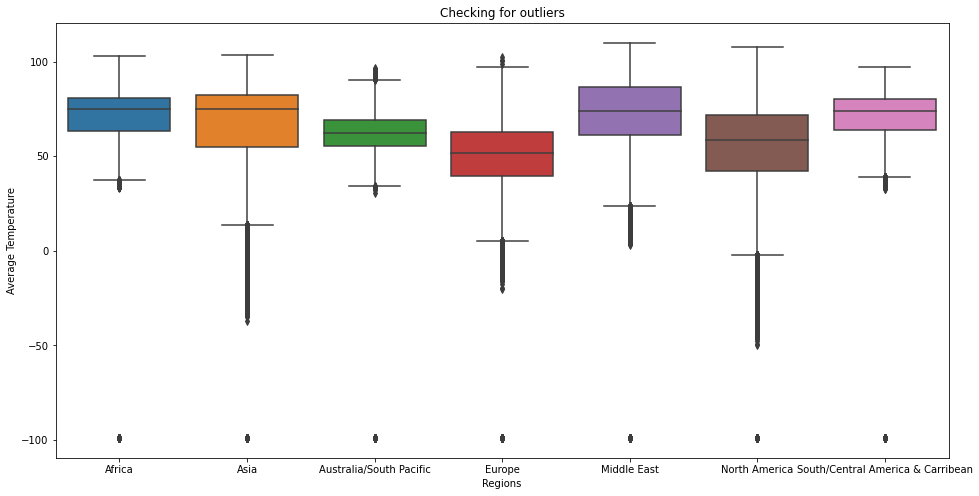

In [19]:
plt.figure(figsize=(16,8))
sns.boxplot(x = "Region", y= "AvgTemperature", data = city_temp).set_title("Checking for outliers")
plt.ylabel("Average Temperature")
plt.xlabel("Regions")

The boxplot shows us the mean, median, min, max and outliers for each region in the data set based on the average temperature. From the plot, there is an outlier that can disturb our results, so we would drop the rows contaning this outlier

In [20]:
city_temp=city_temp.drop(city_temp[city_temp['AvgTemperature']==-99.0].index)

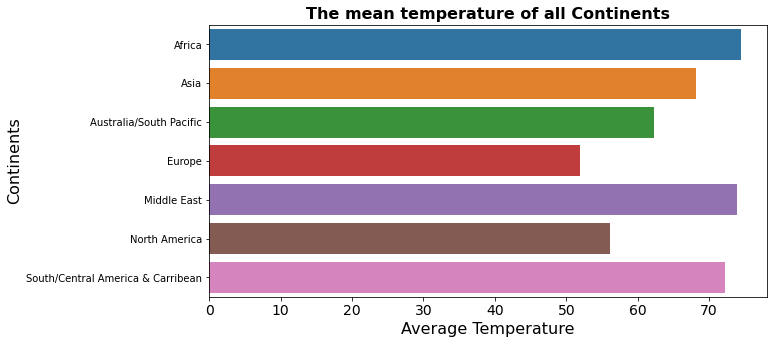

In [21]:
plt.figure(figsize=(10,5))
ax = sns.barplot(y=city_temp.groupby('Region')['AvgTemperature'].mean().index,x=city_temp.groupby('Region')['AvgTemperature'].mean().values)
ax.set_title('The mean temperature of all Continents', fontdict = {'fontsize' : 16}, fontweight = "bold")
ax.set_xlabel("Average Temperature", fontdict = {'fontsize' : 16})
ax.set_ylabel("Continents", fontdict = {'fontsize' : 16})
ax.set_facecolor("white")
ax.tick_params(axis="x", labelsize=14, colors = "black")

The Bar Chart above shows the mean temperature of the various continents. From the chart, Africa, Middle East and South/Central America and Carribean are the hottest continents(Continents with the highest mean temperature)

Text(0.5, 1.0, 'Top 20 Hottest Cities')

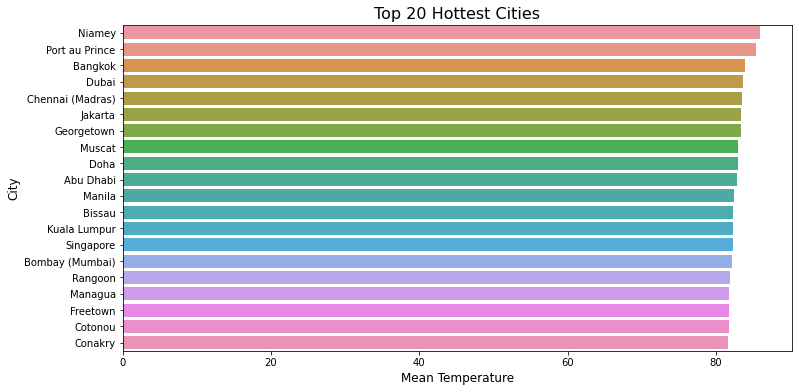

In [22]:
plt.figure(figsize=(12,6))
city_stats = city_temp.groupby('City')['AvgTemperature'].agg(mean_temp='mean').reset_index().sort_values('mean_temp',ascending=False).head(20)
sns.barplot(x='mean_temp',y='City',data=city_stats)
plt.xlabel("Mean Temperature",fontsize=12)
plt.ylabel('City',fontsize=12)
plt.title("Top 20 Hottest Cities",fontsize=16)

As expected, majority of the cities in the Chart above are Cities form the Continents of either Africa or the Middle East as they are the continents with the highest mean temperature.

Text(0.5, 1.0, 'Top 20 Coldest Cities')

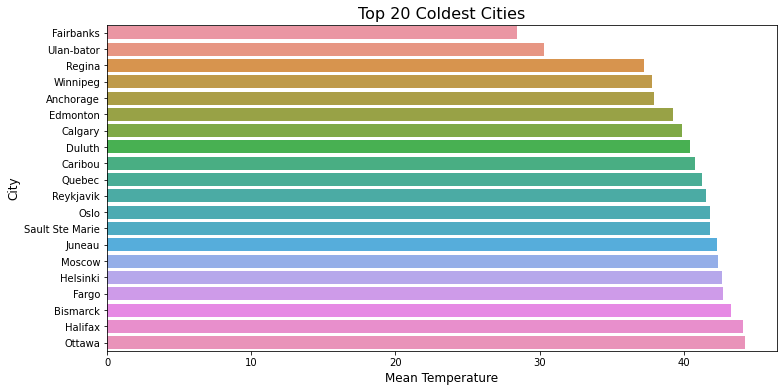

In [23]:
plt.figure(figsize=(12,6))
city_stats = city_temp.groupby('City')['AvgTemperature'].agg(mean_temp='mean').reset_index().sort_values('mean_temp',ascending=True).head(20)
sns.barplot(x='mean_temp',y='City',data=city_stats)
plt.xlabel("Mean Temperature",fontsize=12)
plt.ylabel('City',fontsize=12)
plt.title("Top 20 Coldest Cities",fontsize=16)

Majority of the Cities in this chart are from the either Europe or the North America as they are the continents with the lowest mean temperature.

<AxesSubplot:xlabel='mean_temp', ylabel='City'>

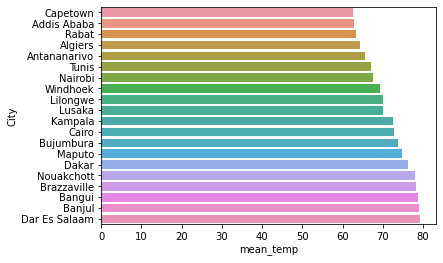

In [24]:
Africa_temp = city_temp[city_temp["Region"] == "Africa"]
africa_stats = Africa_temp.groupby('City')['AvgTemperature'].agg(mean_temp='mean').reset_index().sort_values('mean_temp',ascending=True).head(20)
sns.barplot(x='mean_temp',y='City',data=africa_stats)

The Top 20 Hottest Cities in Africa are shown in the chart above

Text(0.5, 1.0, 'Mean Temperature by Month')

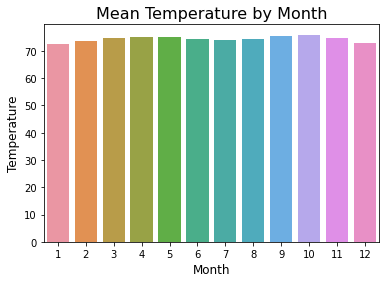

In [25]:
africa_stats_month = Africa_temp.groupby('Month')['AvgTemperature'].agg(mean_temp='mean').reset_index()
sns.barplot(x='Month',y='mean_temp',data=africa_stats_month)
plt.xlabel("Month",fontsize=12)
plt.ylabel('Temperature',fontsize=12)
plt.title("Mean Temperature by Month",fontsize=16)

<AxesSubplot:xlabel='Year'>

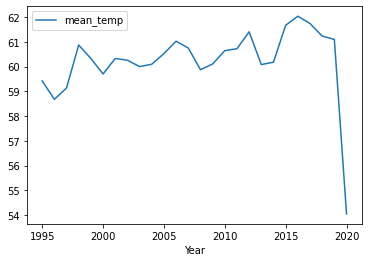

In [26]:
year_stats = city_temp.groupby('Year')['AvgTemperature'].agg(mean_temp='mean')
year_stats.plot(kind = "line")

In [27]:
pivoted_city_temp=pd.pivot_table(city_temp[['Region','AvgTemperature','Year']], 
                          values='AvgTemperature', index = ['Year'],
                          columns=['Region'], aggfunc=np.mean)
pivoted_city_temp.head()

Region,Africa,Asia,Australia/South Pacific,Europe,Middle East,North America,South/Central America & Carribean
Year,,,,,,,
1995,73.890036,67.262985,61.199497,51.539997,71.612651,55.582009,70.642808
1996,73.554702,67.869678,60.956974,50.138435,72.497772,54.123018,70.997554
1997,73.441142,68.348367,61.577032,51.440223,71.081457,54.762592,72.169146
1998,73.748808,69.062920,62.031349,51.866761,73.706373,57.499349,72.146054
1999,73.894222,68.029178,62.095055,52.250955,73.707732,56.569412,71.161597


In [28]:
pip install bar_chart_race

Note: you may need to restart the kernel to use updated packages.


In [29]:
import bar_chart_race as bcr
bcr.bar_chart_race(
        df=pivoted_city_temp, 
        sort='desc',
        title='Mean Temperature of  Continents from 1995 - 2019',
        steps_per_period=20,
        bar_size=.95)
        


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/bar_chart_race/_make_chart.py:286: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(self.df_values.columns)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/bar_chart_race/_make_chart.py:287: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


This is an animated bar chart that shows the change of the tempearutures as the years progress all the way from 1995 to 2019.